# Problem

The regularized least-squares problem has the form

<br>
$$ \min_{\theta} \;\lVert A\theta -y\rVert_2^2 + \lambda \lVert \theta \rVert_2^2$$

(a) Show that the solution is given by
<br><br>
$$ \hat{\theta} = \left( A^T A + \lambda I_n \right)^{-1} A^T y $$
* Do not use the method of Lagrangian multipliers
<br><br>

(b) Write down a gradient descent algorithm for a given optimization problem. Assume the optimization problem in 1D case:

$$ \min_{\theta}  (a\theta -y)^2 + \lambda\theta^2 $$

(c) Based on the result of (b), describe the role of regularizer term.

* Hint: Gradient $g$ is computed by $ g = g_{projection} + g_{regularizer} $.

(d) Describe results of (a) and (b) have the same meaning.

(e) Find and draw an approximated curve of the given data points in Python using your gradient descent algorithm.

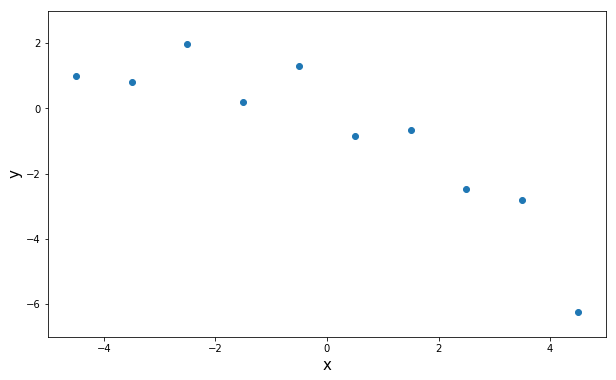

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4.5, 4.5, 10)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512])

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o')
plt.xlabel('x', fontsize=15)
plt.ylabel('y', fontsize=15)
plt.xlim(-5, 5)
plt.ylim(-7, 3)
plt.show()

# 대충순서

## 1. W값 아무걸로 initializing 하기
## 2. W2x^2 + W1x + W0 라인그려보기
## 3. Cost Function (굳이 def function 으로 안만들어도됨) 구하기
## 4. Gradient W 구하기
## 5. iterative 하게 G.D하기
## 5-1. iterative 하게 G.D할때 loss값 줄어드는지 확인

In [15]:
print(x.shape)
print(x)
print(y.shape)
print(y)

(10,)
[-4.5 -3.5 -2.5 -1.5 -0.5  0.5  1.5  2.5  3.5  4.5]
(10,)
[ 0.9819  0.7973  1.9737  0.1838  1.318  -0.8361 -0.6591 -2.4701 -2.8122
 -6.2512]


# 1. W값 아무걸로 initializing 하기

In [16]:
w2 = 1
w1 = 1
w0 = 1
y_hat = w2*x**2 + w1*x + w0
y_hat

array([16.75,  9.75,  4.75,  1.75,  0.75,  1.75,  4.75,  9.75, 16.75,
       25.75])

# 2. W2x^2 + W1x + W0 라인그려보기

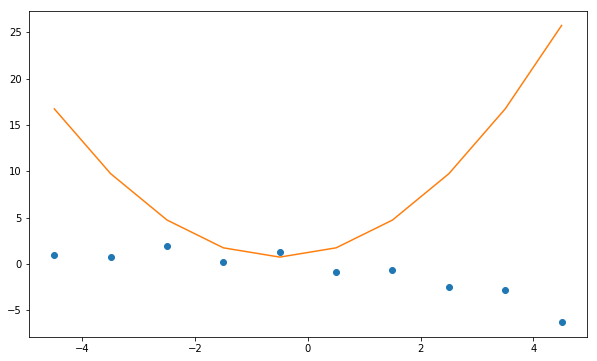

In [17]:
plt.figure(figsize=(10,6))
plt.plot(x,y,'o')
plt.plot(x,y_hat)
plt.show()

# 3. Cost Function (굳이 def function 으로 안만들어도됨) 구하기

In [ ]:
y_hat = w2*x**2 + w1*x + w0

In [24]:
y

array([ 0.9819,  0.7973,  1.9737,  0.1838,  1.318 , -0.8361, -0.6591,
       -2.4701, -2.8122, -6.2512])

In [25]:
y_hat

array([16.75,  9.75,  4.75,  1.75,  0.75,  1.75,  4.75,  9.75, 16.75,
       25.75])

In [27]:
(y_hat-y)**2

array([2.48632978e+02, 8.01508373e+01, 7.70784169e+00, 2.45298244e+00,
       3.22624000e-01, 6.68791321e+00, 2.92583628e+01, 1.49330844e+02,
       3.82679669e+02, 1.02407680e+03])

In [23]:
cost = (y_hat - y)**2
print(cost)
print(np.sum(cost))

[2.48632978e+02 8.01508373e+01 7.70784169e+00 2.45298244e+00
 3.22624000e-01 6.68791321e+00 2.92583628e+01 1.49330844e+02
 3.82679669e+02 1.02407680e+03]
1931.3008533399998


# 4. Gradient W 구하기

In [32]:
grad2 = (y_hat - y)*x**2
grad1 = (y_hat - y)*x
grad0 = (y_hat - y)

grad2 = np.mean(grad2)
grad1 = np.mean(grad1)
grad0 = np.mean(grad0)

print(grad2)
print(grad1)
print(grad0)

142.65623
14.113309999999998
10.0274
